## READING OD CSV FILE THROUGH PANDAS

In [1]:
import pandas as pd      # importing pandas

C:\Users\mdbab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data= pd.read_csv('C://Users//mdbab//OneDrive//Desktop//DATA SCIENCE MATERIAL//DATA//data.csv')  # providing the address of csv file

In [3]:
data.head()   # prints first 5 rows 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.tail()    # prints the last 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
data.shape    # prints the shape of the data

(11914, 16)

In [6]:
data.info()     # provides columns names with non null values and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.duplicated().sum()     # provide nuber of dublicated data

715

In [8]:
data = data.drop_duplicates()     # dropin gthe duplicated data

In [9]:
data.shape      # checking the new shape 

(11199, 16)

In [10]:
data.isnull().sum()  # checeking null values 

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## IMPUTATION  OF NULL VALUES

In [11]:
# importing CategoricalImputer to fill null values in categorical columns
from feature_engine.imputation import CategoricalImputer

In [12]:
# selecting categorical columns
cat_columns = data.select_dtypes(include='O').columns

In [13]:
cat_columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [14]:
cat_imputer = CategoricalImputer(imputation_method='frequent',variables=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type','Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'])

In [15]:
# filling null values and transforming data
data = cat_imputer.fit_transform(data)

In [16]:
# importing MeanMedianImputer from imputation of numercial columns
from feature_engine.imputation import MeanMedianImputer

In [17]:
# selecting numerical columns
numerical_cols = data.select_dtypes(include='number').columns

In [18]:
numerical_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [19]:
numercial_imputer = MeanMedianImputer(imputation_method = 'median',variables=['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG', 'city mpg', 'Popularity', 'MSRP'])

In [20]:
# filling null values and transforming data
data  = numercial_imputer.fit_transform(data)

In [21]:
# checking of null values after iputation
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## OUTLIERS

In [22]:
# importing matplotlib.pyplot for checking of outliers through boxplot
import matplotlib.pyplot as plt 

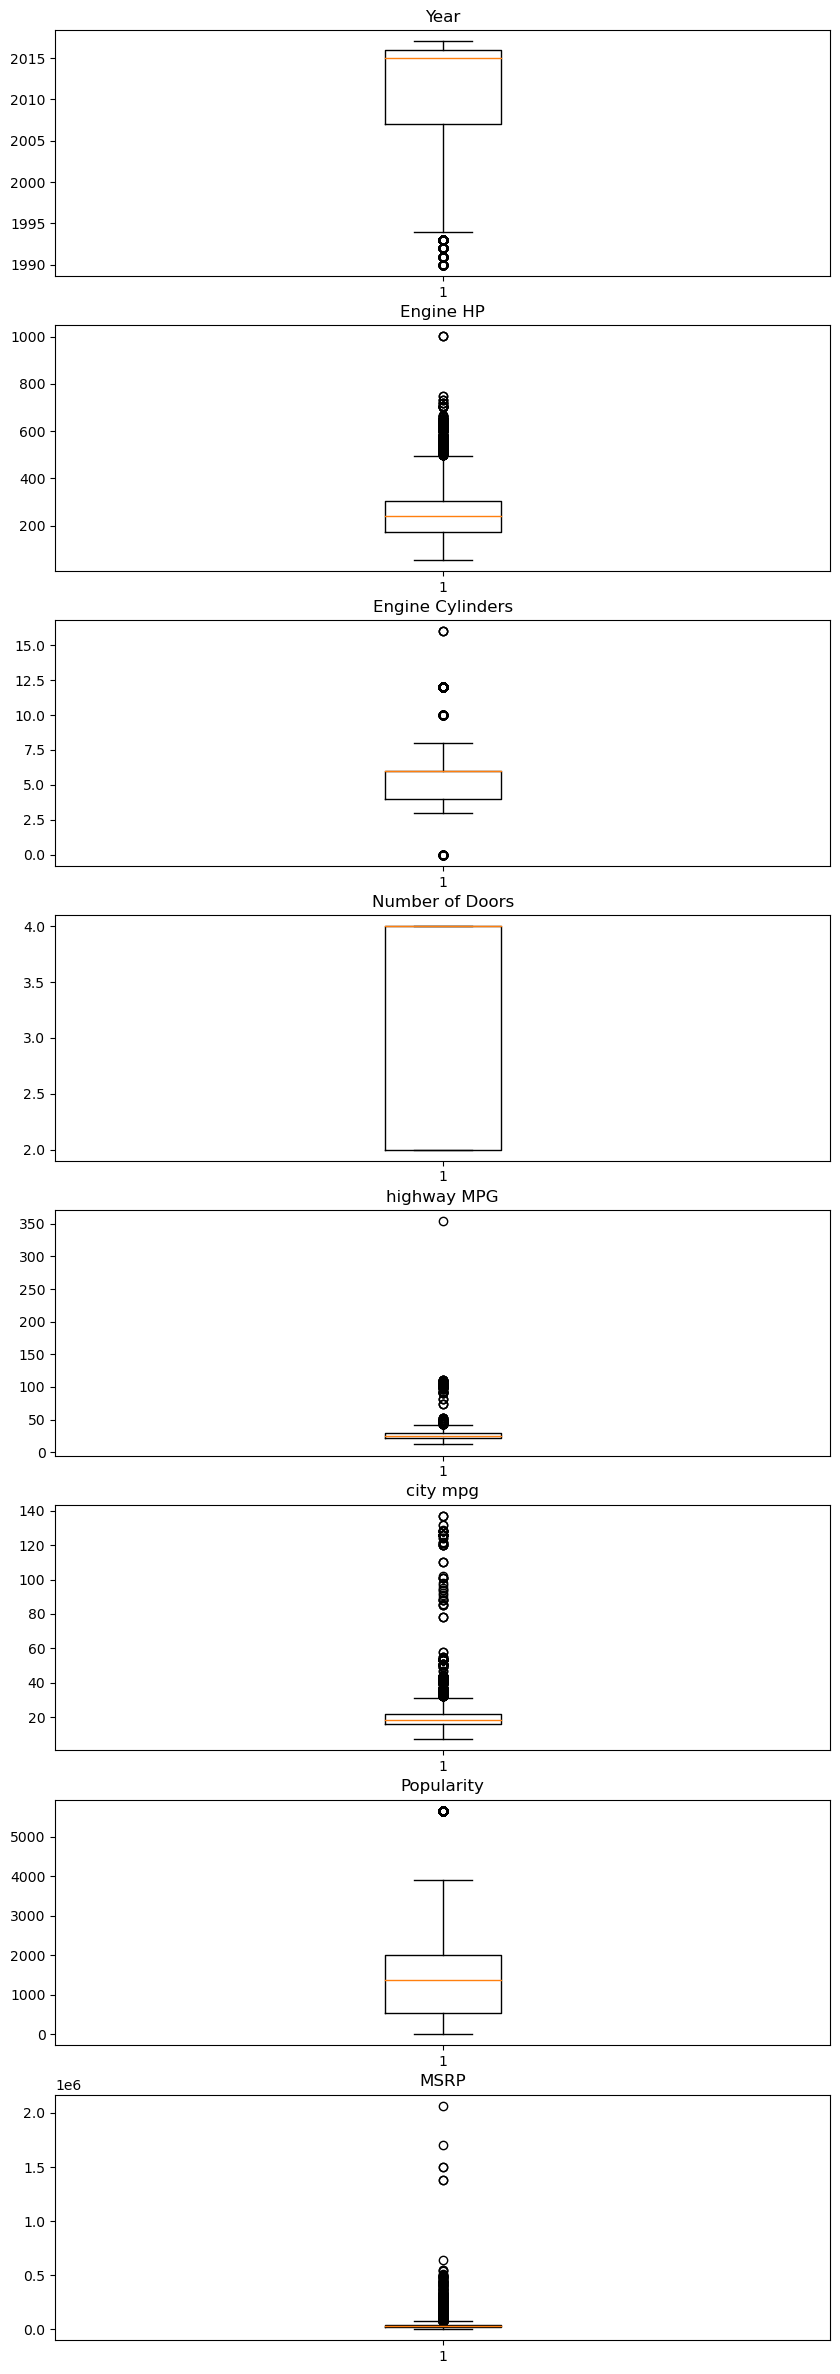

In [23]:
# boxplot for each numerical column.
num_col = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG', 'city mpg', 'Popularity', 'MSRP']
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 30))
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

In [24]:
# capping of outliers by IQR
out_cols = ['Engine HP','highway MPG', 'city mpg', 'Popularity', 'MSRP']
for cols in out_cols:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3-Q1
    m1 = Q1-1.5*IQR
    m2 = Q3+1.5*IQR
    data[cols] = data[cols].clip(lower=m1,upper=m2)

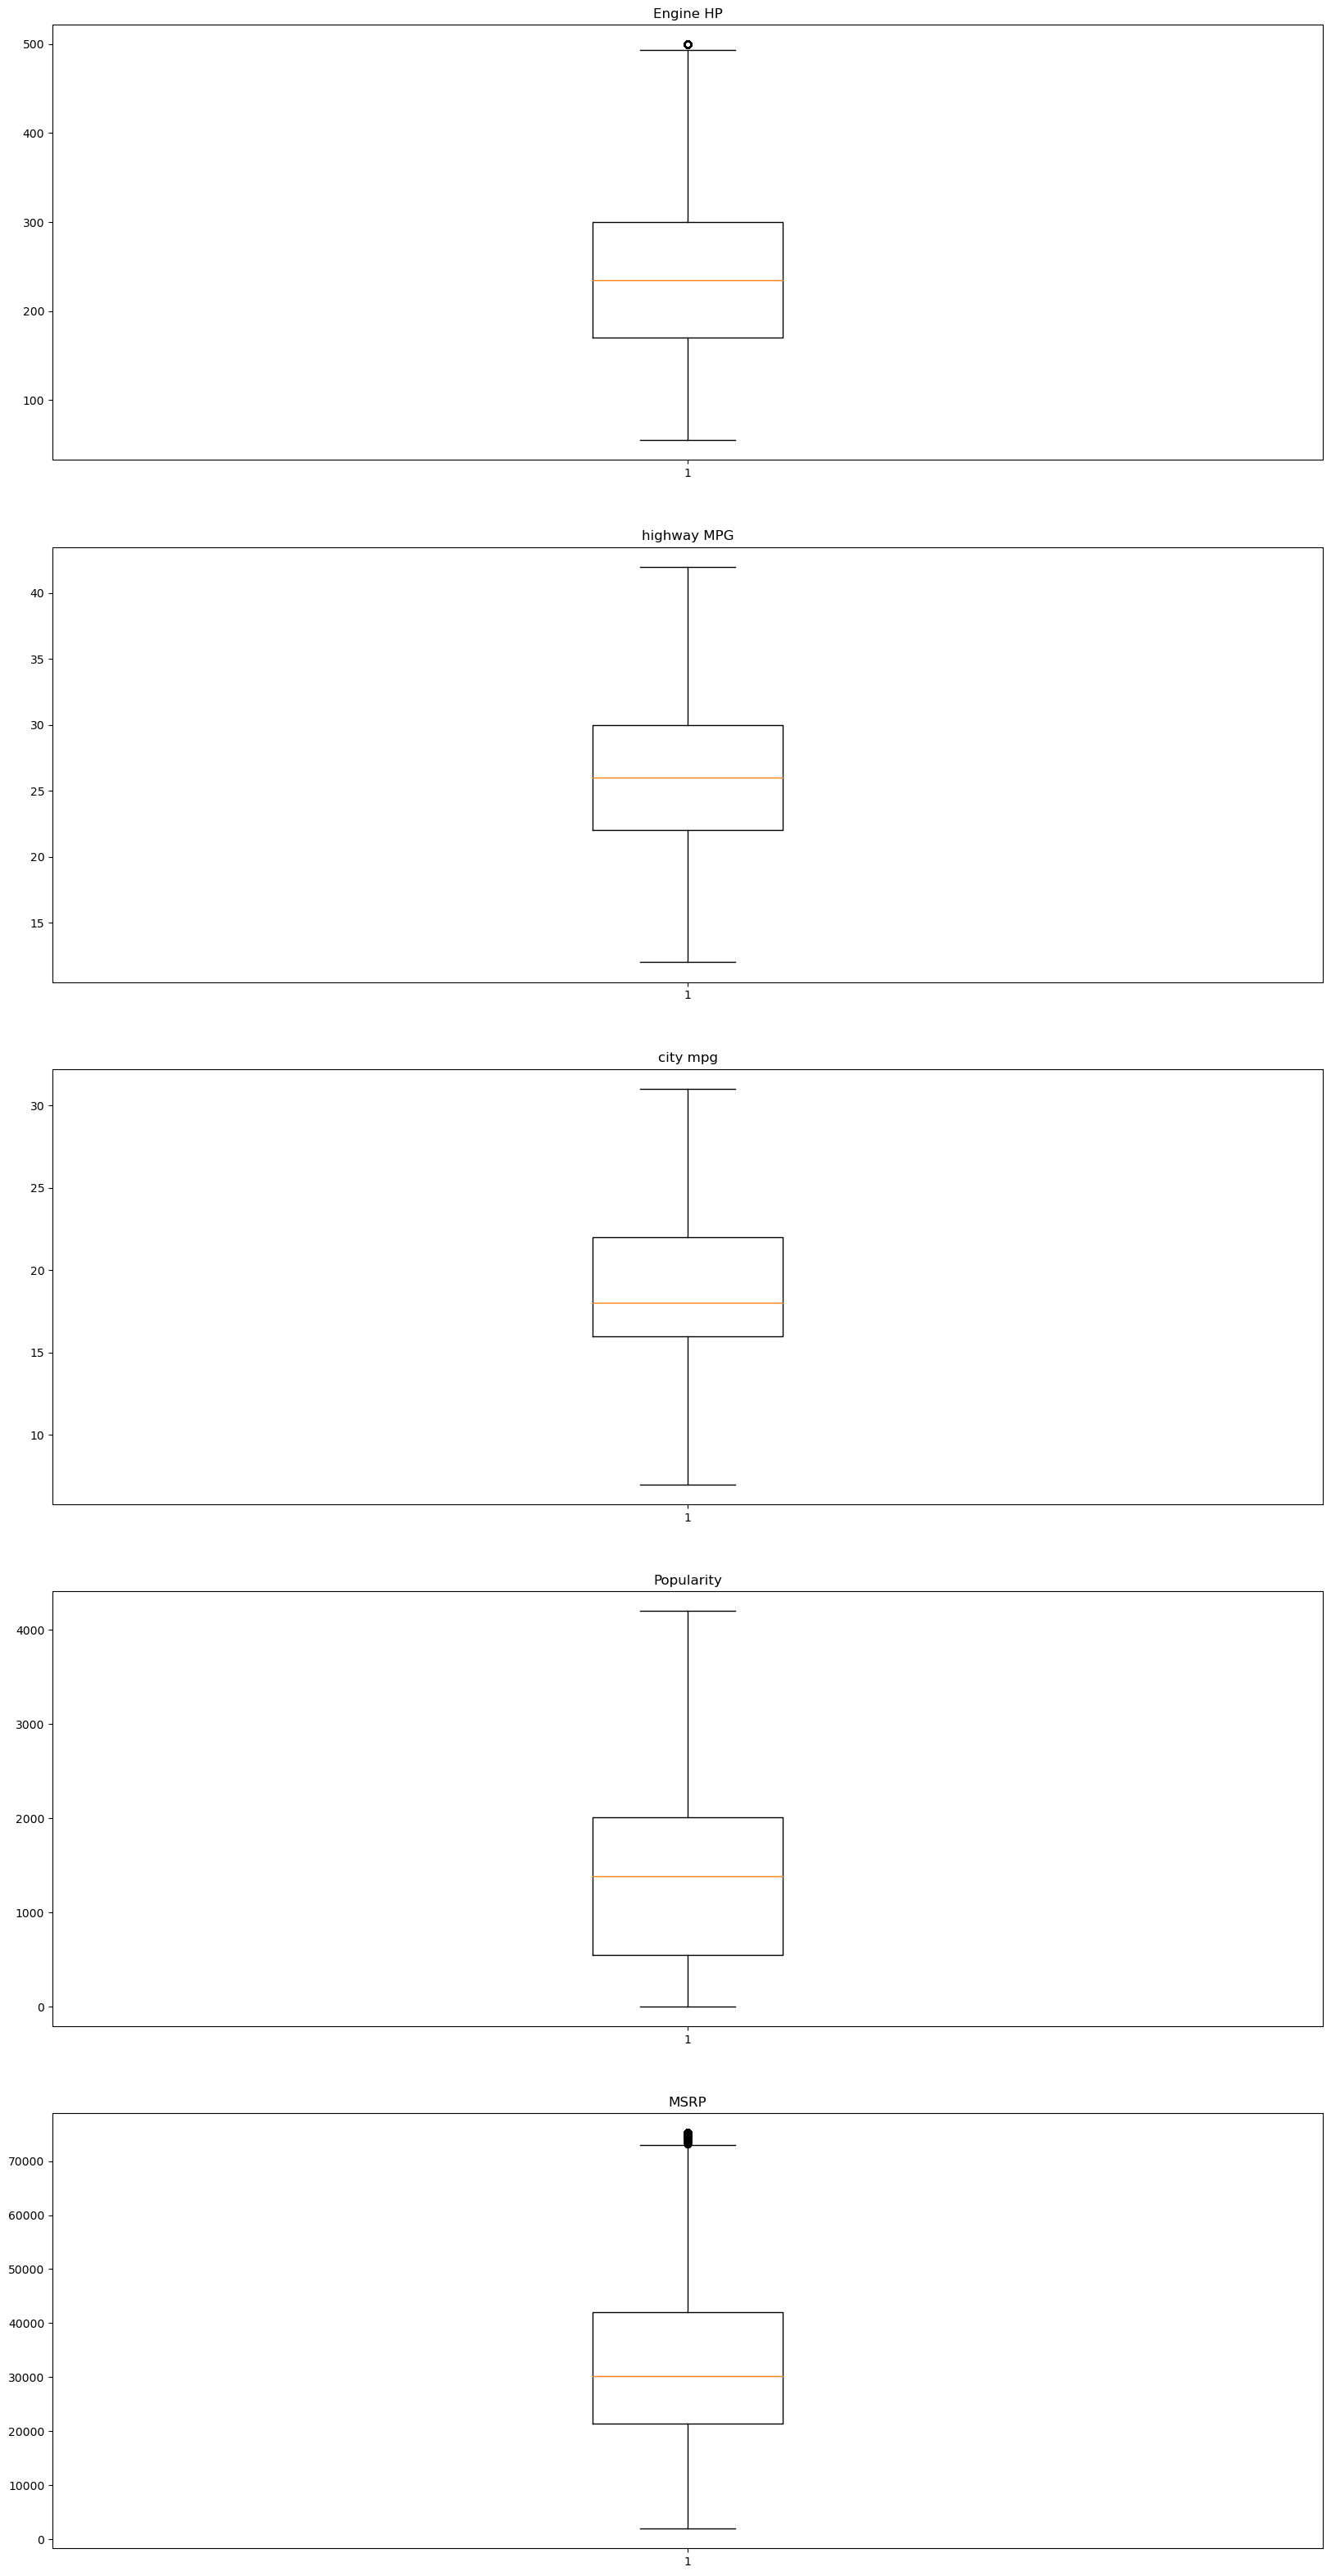

In [85]:
#  checking of boxplot after IQR
num_col = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 40))
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

In [26]:
# checking of duplicated data as capping can cause duplication
data.duplicated().sum()

201

In [27]:
# droping of duplicate data
data = data.drop_duplicates()

## ENCODING

In [28]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
# importing lable encoder for for encoding categorical columns
from sklearn.preprocessing import LabelEncoder 

In [30]:
L_encoder = LabelEncoder()

In [31]:
# encoding categorical data by looping through columns
for i in cat_columns:
    data[i] = L_encoder.fit_transform(data[i])

In [32]:
# data after encoding 
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


## SPLING OF INPUT AND OUTPUT

In [33]:
OUTPUT = data['MSRP']
INPUT =data.drop(columns=['MSRP'])

## SCALING

In [34]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [35]:
ss=MinMaxScaler()

In [36]:
INPUT=pd.DataFrame(ss.fit_transform(INPUT))

In [37]:
INPUT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.085106,0.001094,0.777778,0.888889,0.629921,0.375,0.75,1.0,0.0,0.542857,0.0,0.533333,0.466667,0.500000,0.932571
1,0.085106,0.000000,0.777778,0.888889,0.551181,0.375,0.75,1.0,0.0,0.957143,0.0,0.400000,0.533333,0.500000,0.932571
2,0.085106,0.000000,0.777778,0.888889,0.551181,0.375,0.75,1.0,0.0,0.914286,0.0,0.533333,0.533333,0.541667,0.932571
3,0.085106,0.000000,0.777778,0.888889,0.393701,0.375,0.75,1.0,0.0,0.957143,0.0,0.533333,0.533333,0.458333,0.932571
4,0.085106,0.000000,0.777778,0.888889,0.393701,0.375,0.75,1.0,0.0,0.900000,0.0,0.400000,0.533333,0.458333,0.932571


In [38]:
INPUT = pd.DataFrame(INPUT)

In [39]:
INPUT.columns = ['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','highway MPG','city mpg','Popularity']

In [40]:
INPUT.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,0.085106,0.001094,0.777778,0.888889,0.629921,0.375,0.75,1.0,0.0,0.542857,0.0,0.533333,0.466667,0.500000,0.932571
1,0.085106,0.000000,0.777778,0.888889,0.551181,0.375,0.75,1.0,0.0,0.957143,0.0,0.400000,0.533333,0.500000,0.932571
2,0.085106,0.000000,0.777778,0.888889,0.551181,0.375,0.75,1.0,0.0,0.914286,0.0,0.533333,0.533333,0.541667,0.932571
3,0.085106,0.000000,0.777778,0.888889,0.393701,0.375,0.75,1.0,0.0,0.957143,0.0,0.533333,0.533333,0.458333,0.932571
4,0.085106,0.000000,0.777778,0.888889,0.393701,0.375,0.75,1.0,0.0,0.900000,0.0,0.400000,0.533333,0.458333,0.932571


## DOING TRAINTEST SPLIT

In [41]:
# spliting data into train and test data 
from sklearn.model_selection import train_test_split

In [42]:
Xtrain,xtest,Ytrain,ytest=train_test_split(INPUT,OUTPUT,test_size=0.25,random_state= 1)

## BUILDING ML REGRESSION MODELS

#### LINEAR REGRRESSION

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
L_regression = LinearRegression()

In [45]:
L_regression.fit(Xtrain,Ytrain)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_train_pred = L_regression.predict(Xtrain)
y_test_pred = L_regression.predict(xtest)
Train_accuracy = r2_score(Ytrain,y_train_pred)
Test_accuracy =  r2_score(ytest, y_test_pred)
print("TRAIN ACCURACY : ", Train_accuracy)
print("TEST ACCURACY : ", Test_accuracy)

TRAIN ACCURACY :  0.7885316398442583
TEST ACCURACY :  0.7896407696452663


#### DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
Dt = DecisionTreeRegressor(criterion='squared_error',max_depth = 10,min_samples_split=3)

In [56]:
Dt.fit(Xtrain,Ytrain)

DecisionTreeRegressor(max_depth=10, min_samples_split=3)

In [57]:
y_train_pred = Dt.predict(Xtrain)
y_test_pred = Dt.predict(xtest)
Train_accuracy = r2_score(Ytrain,y_train_pred)
Test_accuracy =  r2_score(ytest, y_test_pred)
print("TRAIN ACCURACY : ", Train_accuracy)
print("TEST ACCURACY : ", Test_accuracy)

TRAIN ACCURACY :  0.9573573693208777
TEST ACCURACY :  0.948937073088865


#### RANDOM FOREST WITH GRIDSEARCHCV

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
R_F = RandomForestRegressor()

In [70]:
para = {'n_estimators':[80,100,120,140],
       'max_depth': [14,12,10,8],
       'min_samples_split': [2,3,4]}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
Grid = GridSearchCV(estimator=R_F,param_grid = para,cv=5)

In [86]:
Grid.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [14, 12, 10, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 120, 140]})

In [87]:
Grid.best_params_

{'max_depth': 14, 'min_samples_split': 3, 'n_estimators': 80}

In [88]:
y_train_pred = Grid.predict(Xtrain)
y_test_pred = Grid.predict(xtest)
Train_accuracy = r2_score(Ytrain,y_train_pred)
Test_accuracy =  r2_score(ytest, y_test_pred)
print("TRAIN ACCURACY : ", Train_accuracy)
print("TEST ACCURACY : ", Test_accuracy)

TRAIN ACCURACY :  0.9846552328273501
TEST ACCURACY :  0.9723972443620766


### SVR

In [75]:
from sklearn.svm import SVR

In [77]:
svr = SVR(kernel= 'linear',degree=4)

In [78]:
svr.fit(Xtrain, Ytrain)

SVR(degree=4, kernel='linear')

In [79]:
y_train_pred = svr.predict(Xtrain)
y_test_pred = svr.predict(xtest)
Train_accuracy = r2_score(Ytrain,y_train_pred)
Test_accuracy =  r2_score(ytest, y_test_pred)
print("TRAIN ACCURACY : ", Train_accuracy)
print("TEST ACCURACY : ", Test_accuracy)

TRAIN ACCURACY :  0.057223189164232524
TEST ACCURACY :  0.051524037379477305
